In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [12]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")

# understand the data

In [3]:
# Q1. How big is the data
df.shape
# shape shows that we have 891 rows and 12 columns

(891, 12)

In [4]:
# q2 How does the data look like
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.sample(4)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S


In [36]:
df.tail()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# q3 Data types anf some info about columns
df.info()
'''
this shows all the columns 
here we have 3 data types float , int and columns
out of which there are 2 floats
                        5 int
                        5 object
our data consumes 83.7 kb of memory
we can see 9 column doesnot have any null values
and 
Age have 891-714 = 177 null values 
cabin have 891-204 = 687 null values  (cabin has most null or empty val)
Embarked have 891-889= 2 null values 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


'\nthis shows all the columns \nhere we have 3 data types float , int and columns\nout of which there are 2 floats\n                        5 int\n                        5 object\nour data consumes 83.7 kb of memory\nwe can see 9 column doesnot have any null values\nand \nAge have 891-714 = 177 null values \ncabin have 891-204 = 687 null values  (cabin has most null or empty val)\nEmbarked have 891-889= 2 null values \n'

In [ ]:
# is there any missing values
df.isnull().sum()
# this hows that age have 177 null values
# this shows cabin have 687 null values 
# this shows Embarked have 2 null values 
# we also seen in above shell by ourself find out null values

In [ ]:
# q5 how does data looks mathematically or statistically
df.describe()

In [ ]:
# q6 are there any duplicate values
df.duplicated().sum()
# here we have no duplicate rows in our dataset

In [ ]:
# q7 . is there any correlation between columns

# Univariate Analysis

In [7]:
#Categorical Data 

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt 

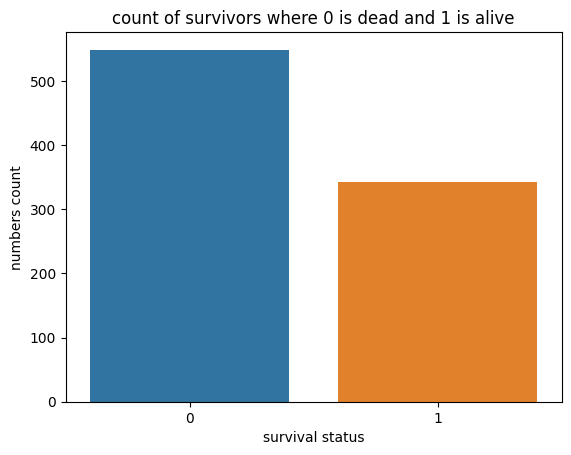

In [24]:
# Countplot
# in future we can first counplot on categorical data
sns.countplot(x='Survived', data=df)
plt.title('count of survivors where 0 is dead and 1 is alive')
plt.xlabel('survival status')
plt.ylabel('numbers count')
plt.show()
# This will show no. of counts of dead and alive
# more than 500 were dead 
# more than 300 were alive

In [23]:
df['Survived'].value_counts()
# we can see here 549 were dead and 342 were alive

Survived
0    549
1    342
Name: count, dtype: int64

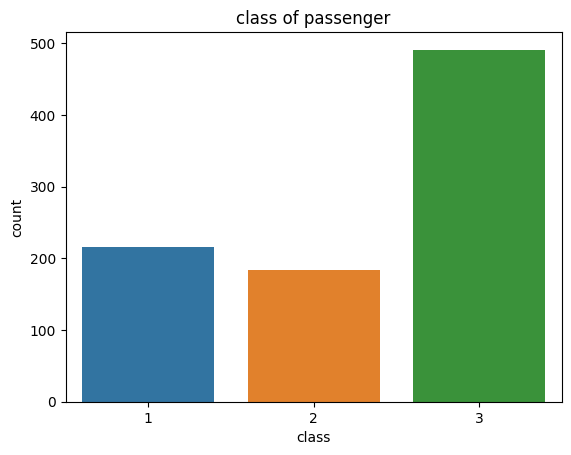

In [25]:
# pclass means in data firstclass, 2ndclass, 3rd class 
sns.countplot(x='Pclass', data=df)
plt.title('class of passenger')
plt.xlabel('class')
plt.ylabel('count')
plt.show()


In [29]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

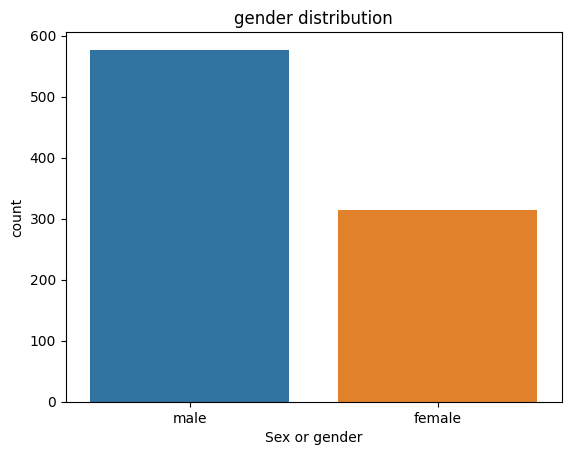

In [30]:
sns.countplot(x='Sex', data=df)
plt.title('gender distribution')
plt.ylabel('count')
plt.xlabel('Sex or gender')
plt.show()

In [33]:
df['Sex'].value_counts()
# we can see 577 were male and 314 were female

Sex
male      577
female    314
Name: count, dtype: int64

In [34]:
577+314

891

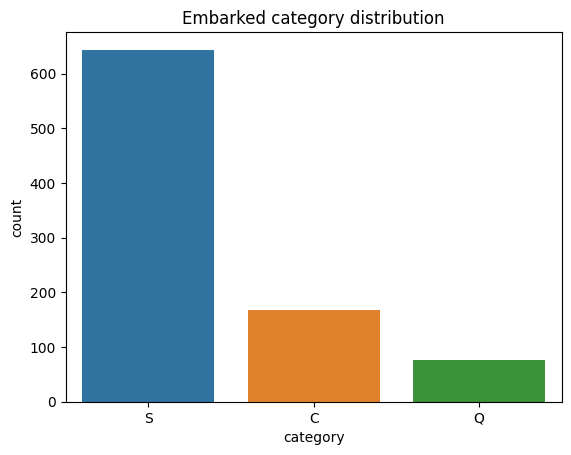

In [44]:
# from where they joined titanic , or kaha bata uniharu titanic ma chade
sns.countplot(x='Embarked', data=df)
plt.title('Embarked category distribution')
plt.xlabel('category')
plt.ylabel('count')
plt.show()

In [40]:
df['Embarked'].value_counts()
# we can see we have S = 644,C=168 and Q=77 category in a embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [43]:
644+168+77
# two entries missing in embarked

889

# piechart

<Axes: ylabel='count'>

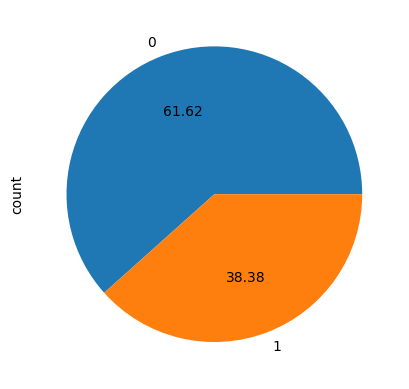

In [57]:

df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')
# Here we can see dead percentage are more than alive
# 61.62 5 are dead and 38.38 are alive

<Axes: ylabel='count'>

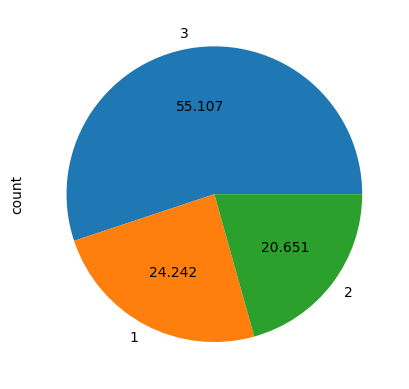

In [59]:
# Piechart of pclass
df['Pclass'].value_counts().plot(kind='pie',autopct='%.3f')

<Axes: ylabel='count'>

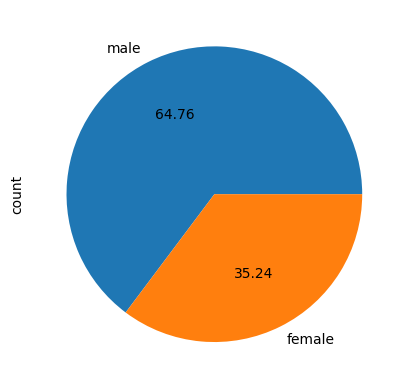

In [61]:
# piechart of Sex
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

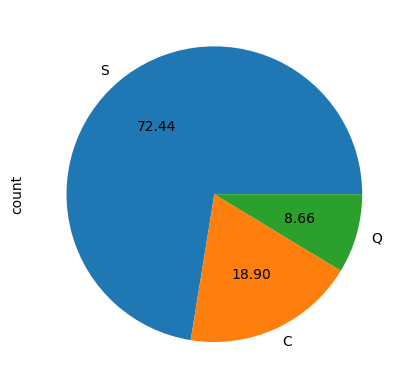

In [62]:
# piechart of Embarked
df['Embarked'].value_counts().plot(kind='pie',autopct='%.2f')

# Numerical Data